In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import os

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Branch data


## Load data


In [4]:
Brands_data = pd.read_csv("Brands_data.csv")

In [5]:
Brands_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   BrandName      122 non-null    object
 1   NumberOfPhone  122 non-null    int64 
 2   BrandUrl       122 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.0+ KB


## Inspection


In [6]:
def inspect_data(data):
    dataCols = data.columns
    NullSum = data.isnull().sum()
    UniqueSum = data.nunique()
    ColType = data.dtypes
    # nsamples = 5
    # Samples = [', '.join([str(data[col][i]) for i in range(nsamples)]) for col in data.columns]
    n_UniqueSample = 5
    UniqueSamples = [', '.join([str(data[col].unique()[i]) for i in range(n_UniqueSample if len(
        data[col].unique()) > n_UniqueSample else len(data[col].unique()))]) for col in data.columns]

    Inspec = pd.DataFrame({'Column': dataCols, 'NullSum': NullSum,
                          'UniqueSum': UniqueSum, 'Type': ColType, 'Unique Sample': UniqueSamples})
    Inspec.index = [i for i in range(1, len(data.columns)+1)]
    return Inspec

In [7]:
display(inspect_data(Brands_data))

,Column,NullSum,UniqueSum,Type,Unique Sample
1,BrandName,0,122,object,"Acer, alcatel, Allview, Amazon, Amoi"
2,NumberOfPhone,0,85,int64,"100, 409, 157, 25, 47"
3,BrandUrl,0,122,object,"https://www.gsmarena.com/acer-phones-59.php, https://www.gsmarena.com/alcatel-phones-5.php, https://www.gsmarena.com/allview-phones-88.php, https://www.gsmarena.com/amazon-phones-76.php, https://www.gsmarena.com/amoi-phones-28.php"


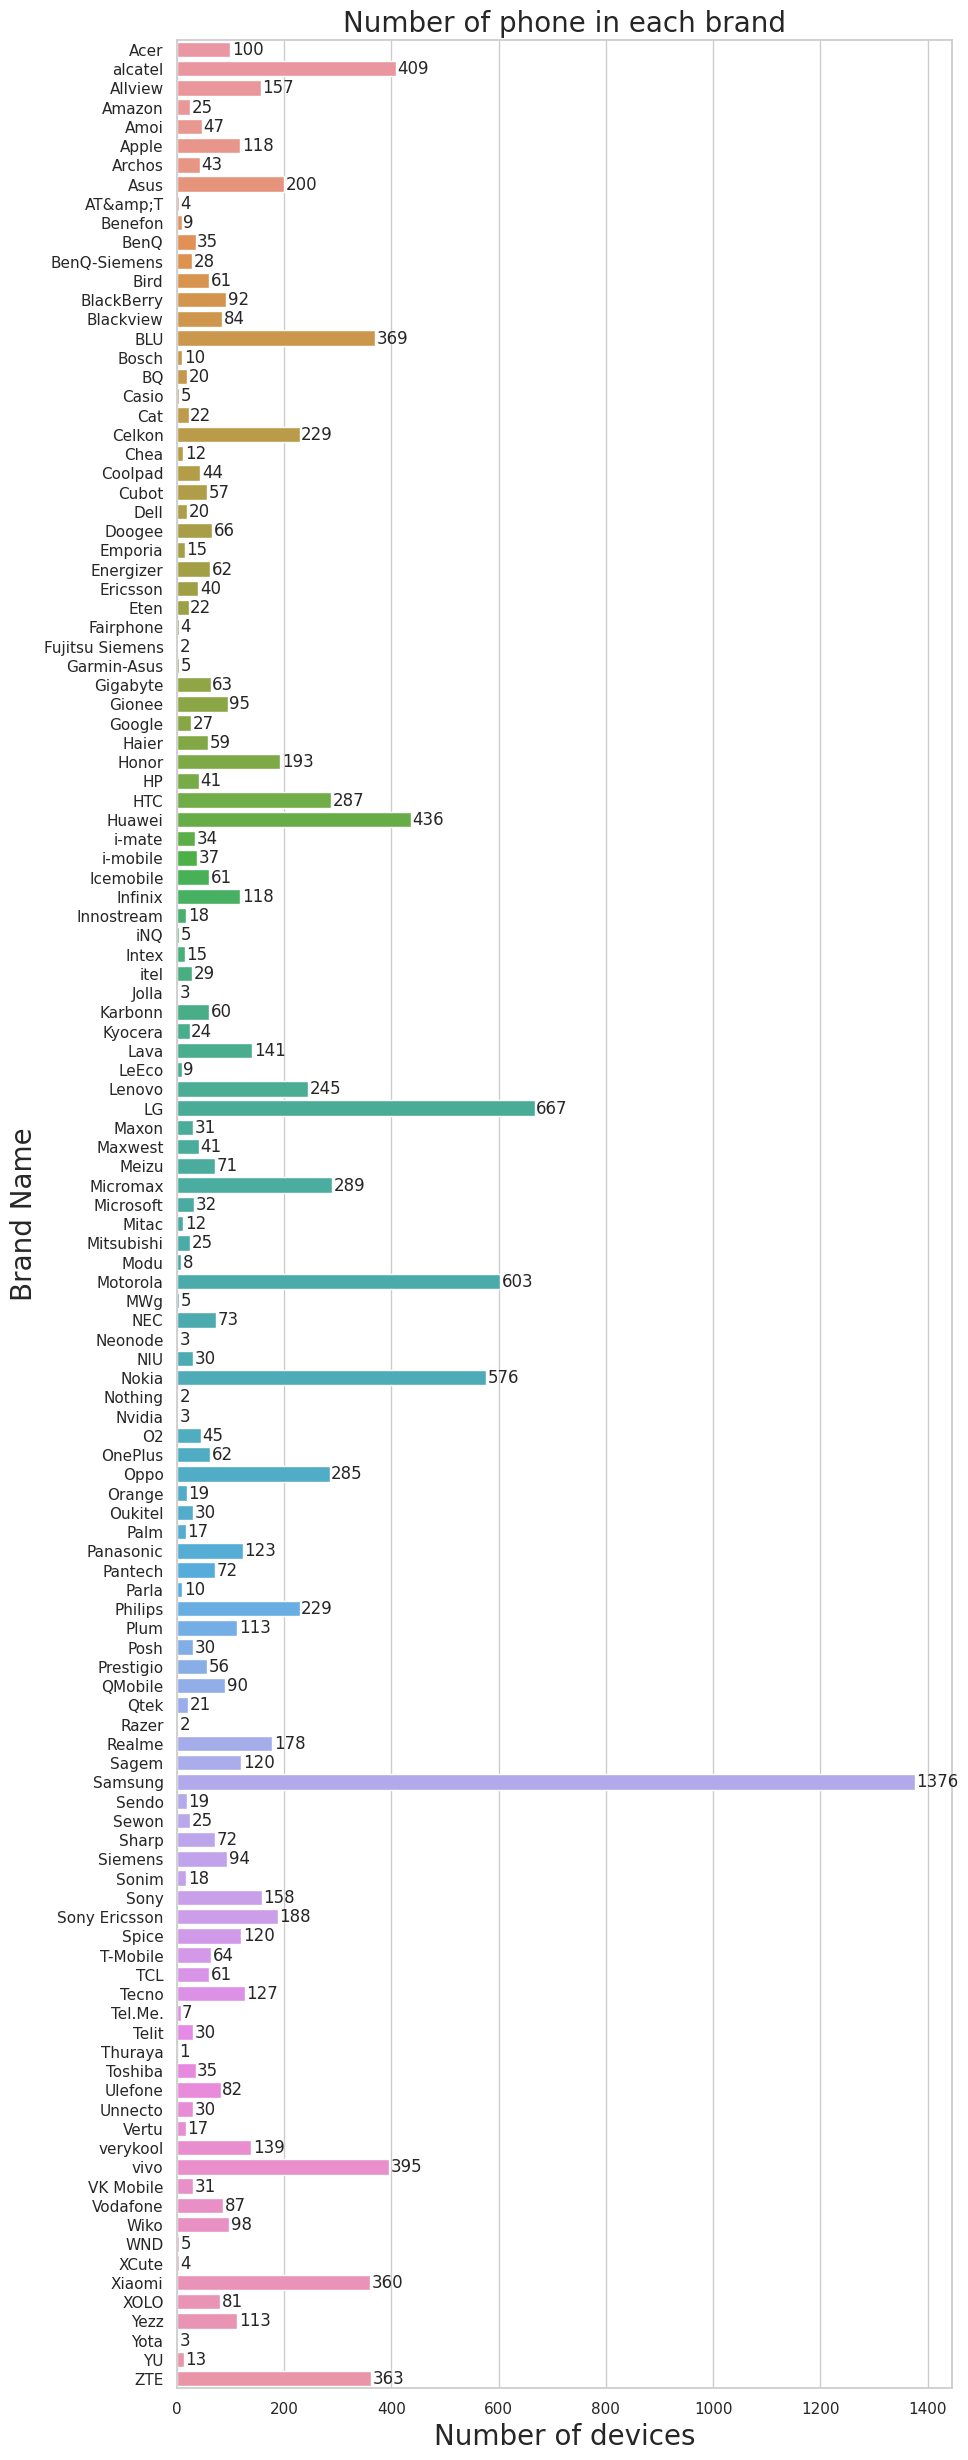

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, len(Brands_data)/4))
ax = sns.barplot(x="NumberOfPhone", y="BrandName", data=Brands_data)
plt.title('Number of phone in each brand', fontsize=20)
plt.xlabel('Number of devices', fontsize=20)
plt.ylabel('Brand Name', fontsize=20)
# add numbers on each bars
for i, v in enumerate(Brands_data['NumberOfPhone']):
    ax.text(v + 3, i + .25, str(v))
plt.show()

In [9]:
print('Total number of devieces: ', Brands_data['NumberOfPhone'].sum())

Total number of devieces:  12605


# Devices url data


## Load data


In [11]:
Devices_url = pd.read_csv("Devices_url.csv")

In [12]:
Devices_url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515 entries, 0 to 12514
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  12515 non-null  object
 1   DeviceUrl  12515 non-null  object
dtypes: object(2)
memory usage: 195.7+ KB


## Inspection


In [13]:
inspect_data(Devices_url)

,Column,NullSum,UniqueSum,Type,Unique Sample
1,BrandName,0,121,object,"Acer, alcatel, Allview, Amazon, Amoi"
2,DeviceUrl,0,12515,object,"https://www.gsmarena.com/acer_chromebook_tab_10-9139.php, https://www.gsmarena.com/acer_iconia_talk_s-8306.php, https://www.gsmarena.com/acer_liquid_z6_plus-8305.php, https://www.gsmarena.com/acer_liquid_z6-8304.php, https://www.gsmarena.com/acer_iconia_tab_10_a3_a40-8080.php"


In [17]:
# count number of links in each brand
def compareNumberOfLinkWithNumberOfPhone(BrandsData, DevicesUrl):
    com = {
        'BrandName': [],
        'NumberOfPhone': [],
        'NumberOfLink': [],
        'Match': [],
        'MissMatchCount': []
    }
    for i in range(len(BrandsData)):
        com['BrandName'].append(BrandsData['BrandName'][i])

        # get number of phone in each brand
        NumOfPhone = BrandsData['NumberOfPhone'][i]
        com['NumberOfPhone'].append(NumOfPhone)

        # count number of brandname appear in Devices_url
        try:
            NumOfLink = Devices_url['BrandName'].value_counts()[
                BrandsData['BrandName'][i]]
        except:
            NumOfLink = 0
        com['NumberOfLink'].append(NumOfLink)

        # compare number of phone and number of link, if match then True, else False
        com['Match'].append(NumOfLink == NumOfPhone)

        # count number of miss match
        com['MissMatchCount'].append(NumOfPhone - NumOfLink)

    return pd.DataFrame(com)


com = compareNumberOfLinkWithNumberOfPhone(Brands_data, Devices_url)
# get Brands that have number of phone not match with number of link
BrandsNotMatch = com[com['Match'] == False]
display(BrandsNotMatch)

,BrandName,NumberOfPhone,NumberOfLink,Match,MissMatchCount
1,alcatel,409,400,False,9
14,Blackview,84,80,False,4
40,Huawei,436,434,False,2
44,Infinix,118,117,False,1
52,Lava,141,140,False,1
54,Lenovo,245,240,False,5
55,LG,667,660,False,7
64,Motorola,603,600,False,3
74,Oppo,285,280,False,5
76,Oukitel,30,0,False,30


# Devices Specs data

## Load data

In [18]:
Specs_data = pd.read_csv("Devices_Specs.csv")
Specs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12513 entries, 0 to 12512
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Brand                  12513 non-null  object
 1   url                    12513 non-null  object
 2   imgUrl                 12513 non-null  object
 3   Name                   12513 non-null  object
 4   NETWORK_Technology     12513 non-null  object
 5   NETWORK_2G_bands       12513 non-null  object
 6   NETWORK_3G_bands       8678 non-null   object
 7   NETWORK_4G_bands       5285 non-null   object
 8   NETWORK_5G_bands       1087 non-null   object
 9   NETWORK_GPRS           4178 non-null   object
 10  NETWORK_EDGE           4185 non-null   object
 11  NETWORK_Speed          8643 non-null   object
 12  LAUNCH_Announced       12501 non-null  object
 13  LAUNCH_Status          12513 non-null  object
 14  BODY_Dimensions        12492 non-null  object
 15  BODY_Weight        

## Inspection

In [19]:
inspect_data(Specs_data)

,Column,NullSum,UniqueSum,Type,Unique Sample
1,Brand,0,121,object,"Acer, alcatel, Allview, Amazon, Amoi"
2,url,0,12513,object,"https://www.gsmarena.com/acer_chromebook_tab_10-9139.php, https://www.gsmarena.com/acer_iconia_talk_s-8306.php, https://www.gsmarena.com/acer_liquid_z6_plus-8305.php, https://www.gsmarena.com/acer_liquid_z6-8304.php, https://www.gsmarena.com/acer_iconia_tab_10_a3_a40-8080.php"
3,imgUrl,0,11973,object,"https://fdn2.gsmarena.com/vv/bigpic/acer-chromebook-tab-10.jpg, https://fdn2.gsmarena.com/vv/bigpic/acer-iconia-talk-s.jpg, https://fdn2.gsmarena.com/vv/bigpic/acer-liquid-z6-plus.jpg, https://fdn2.gsmarena.com/vv/bigpic/acer-liquid-z6.jpg, https://fdn2.gsmarena.com/vv/bigpic/acer-iconia-tab-10-a3-a40.jpg"
4,Name,0,12513,object,"Acer Chromebook Tab 10, Acer Iconia Talk S, Acer Liquid Z6 Plus, Acer Liquid Z6, Acer Iconia Tab 10 A3-A40"
5,NETWORK_Technology,0,45,object,"No cellular connectivity, GSM / HSPA / LTE, GSM / HSPA, GSM, GSM / UMTS"
6,NETWORK_2G_bands,0,223,object,"N/A, GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2, GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (dual-SIM model only), GSM 850 / 900 / 1800 / 1900 , GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 & SIM 3"
7,NETWORK_3G_bands,3835,743,object,"nan, HSDPA 850 / 1900 / 2100 , HSDPA, HSDPA 900 / 1900 / 2100 - Europe, Taiwan, HSDPA 900 / 2100"
8,NETWORK_4G_bands,7228,1550,object,"nan, 1, 3, 7, 8, 20, LTE (unspecified), LTE 800 / 1800 / 2100 / 2600 - Europe, 1, 3, 7, 20"
9,NETWORK_5G_bands,11426,405,object,"nan, 1, 2, 3, 5, 7, 8, 12, 20, 25, 26, 28, 30, 38, 40, 41, 48, 53, 66, 70, 77, 78, 79 SA/NSA/Sub6 - A3106, 1, 2, 3, 5, 7, 8, 12, 20, 25, 26, 28, 30, 38, 40, 41, 48, 53, 66, 70, 77, 78, 79 SA/NSA/Sub6 - A3102, 1, 2, 3, 5, 7, 8, 12, 20, 25, 26, 28, 30, 38, 40, 41, 48, 53, 66, 70, 77, 78, 79 SA/NSA/Sub6 - A3094, 1, 2, 3, 5, 7, 8, 12, 20, 25, 26, 28, 30, 38, 40, 41, 48, 53, 66, 70, 77, 78, 79 SA/NSA/Sub6 - A3090"
10,NETWORK_GPRS,8335,32,object,"No, nan, Yes, Class 10, Class 12"


Nhận xét: trừ MAIN_CAM_1_Module, SELFIE_CAM_2_Module được xử lý sẵn trong lúc crawl, còn lại dữ liệu đề có dạng object (string)